# Statistiques descriptives

# Découverte de Pandas

## Manipulation de tableaux de données avec pandas

In [1]:
import pandas as pd
# Choisir ce jeu de données par défaut
df = pd.read_csv("https://raw.githubusercontent.com/lgreski/pokemonData/master/Pokemon.csv")
# Choisir ce jeu de données si vous êtes expert-dresseur et savez ce que vous faites
# df = pandas.read_csv("./pokemon2.csv")

In [2]:
df.head()

,ID,Name,Form,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,Bulbasaur,,Grass,Poison,318,45,49,49,65,65,45,1
1,2,Ivysaur,,Grass,Poison,405,60,62,63,80,80,60,1
2,3,Venusaur,,Grass,Poison,525,80,82,83,100,100,80,1
3,4,Charmander,,Fire,,309,39,52,43,60,50,65,1
4,5,Charmeleon,,Fire,,405,58,64,58,80,65,80,1


In [3]:
df.dtypes

ID             int64
Name          object
Form          object
Type1         object
Type2         object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
dtype: object

In [4]:
df.loc[12] # Accès à la ligne 12

ID                13
Name          Weedle
Form                
Type1            Bug
Type2         Poison
Total            195
HP                40
Attack            35
Defense           30
Sp. Atk           20
Sp. Def           20
Speed             50
Generation         1
Name: 12, dtype: object

In [5]:
df.iloc[12, 0] # Accès à ligne 12 colonne 0 avec les indices

13

In [6]:
df.loc[12, 'ID'] # Accès grâces aux clés

13

In [7]:
df.loc[[9, 13], ['Name', 'Attack']]

,Name,Attack
9,Caterpie,30
13,Kakuna,25


In [8]:
df.loc[10:20,['Name', 'Attack']]

,Name,Attack
10,Metapod,20
11,Butterfree,45
12,Weedle,35
13,Kakuna,25
14,Beedrill,90
15,Pidgey,45
16,Pidgeotto,60
17,Pidgeot,80
18,Rattata,56
19,Raticate,81


In [9]:
df[df['Attack']>160]['Name']

389        Deoxys
414     Rampardos
669        Kyurem
688        Mewtwo
693     Heracross
695     Tyranitar
708       Banette
716       Groudon
717      Rayquaza
719      Garchomp
722       Gallade
913       Kartana
918      Necrozma
1064      Calyrex
Name: Name, dtype: object

Explications :

- df['Attack']>160 retourne une Series de booléens indiquant, pour chaque élément de la colonne Attack, s’il est ou non supérieur à 160.

- df[df['Attack']>160] sélection la partie du tableau correspondante

- df[df['Attack']>160]['Name'] restriction de ce sous-tableau à la colonne Name

On peut combiner (mais attention, pandas a ses propres opérateurs logiques, et les parenthèses sont indispensables) :

In [10]:
selection = df[(df['Attack']>130) & (df['Defense']>140)]['Name']

print("Les pokemons ayant plus 130 en attaque et plus de 140 en défense sont : ", 
      ' '.join(selection.tolist()))

Les pokemons ayant plus 130 en attaque et plus de 140 en défense sont :  Tyranitar Aggron Metagross Groudon Stakataka Melmetal Calyrex


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          1194 non-null   int64 
 1   Name        1194 non-null   object
 2   Form        1194 non-null   object
 3   Type1       1194 non-null   object
 4   Type2       1194 non-null   object
 5   Total       1194 non-null   int64 
 6   HP          1194 non-null   int64 
 7   Attack      1194 non-null   int64 
 8   Defense     1194 non-null   int64 
 9   Sp. Atk     1194 non-null   int64 
 10  Sp. Def     1194 non-null   int64 
 11  Speed       1194 non-null   int64 
 12  Generation  1194 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 121.4+ KB


### Exercice « MAIS POURQUOI ON A FAIT TOUT ÇA ? »

Les modules pandas et numpy incluent la plupart des fonctions que nous avons impléentées lors des séquences précédentes…

À l’aide la documentation et d’un peu de flair, retrouver les fonctions/méthodes correspondant à celles des TP précédents. S’il en manque, on pourra recourir au module statistics.

In [12]:
import statistics as st

# Méthodes statistiques appliquées à la colonne "Attaque"

# On a certaines fonctions équivalentes pour la description statistique

print("Moyenne         : ",round(df["Attack"].mean(),2))
print("Médiane         : ",round(df["Attack"].median(),2))
print("Écart-type      : ",round(df["Attack"].std(),2))
print("1er quartile    : ",round(df["Attack"].quantile(0.25), 2))
print("3eme quartile   : ",round(df["Attack"].quantile(0.75), 2))
print("Variance.       : ",round(df["Attack"].var(), 2))

Moyenne         :  80.95
Médiane         :  80.0
Écart-type      :  32.12
1er quartile    :  56.0
3eme quartile   :  100.0
Variance.       :  1031.84


In [13]:
# Mais on peut utiliser ceci à la place :

df["Attack"].describe()

count    1194.000000
mean       80.948911
std        32.122250
min         5.000000
25%        56.000000
50%        80.000000
75%       100.000000
max       190.000000
Name: Attack, dtype: float64

In [14]:
df["Defense"].corr(df["HP"], 'pearson') # Coefficient de Pearson entre les PV et la Défense

0.3243577213631351

In [15]:
df["Defense"].corr(df["HP"], 'spearman') # Coefficient de Spearman entre les PV et la Défense

0.4766654762312115

array([[<AxesSubplot:title={'center':'Attack'}>]], dtype=object)

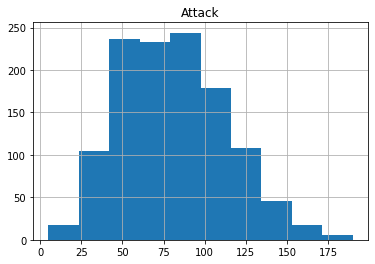

In [16]:
# distribution
df.hist("Attack")

In [17]:
# conversion en rangs
df["Attack"].rank()

0        182.0
1        367.5
2        656.5
3        236.5
4        382.5
         ...  
1189    1103.0
1190    1129.5
1191     697.5
1192     663.5
1193    1103.0
Name: Attack, Length: 1194, dtype: float64

In [18]:
# tableau de contingence entre la génération et les types

type = df["Type1"].copy()
type.add(df["Type2"])

pd.crosstab(df["Generation"], type)

Type1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Generation,,,,,,,,,,,,,,,,,,
1,12,0,3,9,2,7,12,0,3,12,8,2,22,14,8,9,0,28
2,10,5,0,6,5,2,8,0,1,9,3,4,15,1,7,4,2,18
3,12,4,7,4,0,4,7,0,4,12,6,7,18,3,11,8,9,25
4,12,3,3,12,1,2,5,0,7,14,4,3,17,6,7,6,3,13
5,18,13,9,8,0,7,9,2,5,15,10,6,18,2,14,6,4,19
6,7,6,10,5,9,5,12,2,12,8,1,3,8,2,10,11,9,11
7,9,5,5,7,1,4,7,0,5,13,4,4,13,8,10,12,4,11
8,4,12,4,13,6,13,8,4,5,10,6,11,7,5,13,4,8,14
9,7,8,8,9,7,6,7,2,5,12,4,3,13,4,2,7,4,11


## 2 Profiling

In [19]:
import pandas_profiling
report = pandas_profiling.ProfileReport(df)
report.to_file(output_file='./rapport.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 3 Activités pratiques

In [20]:
def podiums(df):
    podiums = []
    stats = ["Total", "HP", "Attack", "Sp. Atk", "Defense", "Sp. Def", "Speed"]
    for stat in stats:
        podiums.append(df.sort_values(by=stat, ascending=False).head(3))
        
    for i in range(len(podiums)):
        print(f"                     {stats[i]}\n")
        print(podiums[i].loc[:,["Name", "Form", stats[i]]], "\n\n")

In [21]:
podiums(df)

                     Total

           Name           Form  Total
1054  Eternatus      Eternamax   1125
689      Mewtwo  Mega Mewtwo Y    780
688      Mewtwo  Mega Mewtwo X    780 


                     HP

           Name       Form   HP
1054  Eternatus  Eternamax  255
241     Blissey             255
112     Chansey             250 


                     Attack

          Name            Form  Attack
688     Mewtwo   Mega Mewtwo X     190
693  Heracross  Mega Heracross     185
913    Kartana                     181 


                     Sp. Atk

       Name           Form  Sp. Atk
689  Mewtwo  Mega Mewtwo Y      194
389  Deoxys   Attack Forme      180
715  Kyogre  Primal Kyogre      180 


                     Defense

           Name         Form  Defense
1054  Eternatus    Eternamax      250
702      Aggron  Mega Aggron      230
212     Shuckle                   230 


                     Sp. Def

           Name       Form  Sp. Def
1054  Eternatus  Eternamax      250
212     S

In [78]:
import scipy.stats as st

def eval_dec(df, selec):
    deck = df.loc[selec]
    
    # Moyennes des statistiques
    
    hp = deck['HP'].mean()
    atk = deck['Attack'].mean()
    pdef = deck['Defense'].mean()
    spatk = deck['Sp. Atk'].mean()
    spdef = deck['Sp. Def'].mean()
    speed = deck['Speed'].mean()
    
    print("*** Moyennes des statistiques de l'équipe ***\n")
    print(f"HP       : {round(hp, 2):>6}")
    print(f"Attack   : {round(atk, 2):>6}")
    print(f"Defense  : {round(pdef, 2):>6}")
    print(f"Sp. Atk  : {round(spatk, 2):>6}")
    print(f"Sp. Def  : {round(spdef, 2):>6}")
    print(f"Speed    : {round(speed, 2):>6}")
    
    # Quantile de chaque statistique
    
    print("\n\n*** Quantiles des statistiques de l'équipe ***\n")
    print(f"HP       : {st.percentileofscore(df['HP'], round(hp, 2))}")
    print(f"Attack   : {st.percentileofscore(df['Attack'], round(atk, 2))}")
    print(f"Defense  : {st.percentileofscore(df['Defense'], round(pdef, 2))}")
    print(f"Sp. Atk  : {st.percentileofscore(df['Sp. Atk'], round(spatk, 2))}")
    print(f"Sp. Def  : {st.percentileofscore(df['Sp. Def'], round(spdef, 2))}")
    print(f"Speed    : {st.percentileofscore(df['Speed'], round(speed, 2))}")    

In [83]:
selec = [150, 444, 350, 802, 5, 497]
df.loc[selec]

,ID,Name,Form,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
150,151,Mew,,Psychic,,600,100,100,100,100,100,100,1
444,435,Skuntank,,Poison,Dark,479,103,93,67,71,61,84,4
350,351,Castform,,Normal,,420,70,70,70,70,70,70,3
802,719,Diancie,Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6
5,6,Charizard,,Fire,Flying,534,78,84,78,109,85,100,1
497,483,Dialga,,Steel,Dragon,680,100,120,120,150,100,90,4


In [85]:
eval_dec(df, selec)

*** Moyennes des statistiques de l'équipe ***

HP       :   83.5
Attack   :  104.5
Defense  :  90.83
Sp. Atk  :  110.0
Sp. Def  :  87.67
Speed    :  92.33


*** Quantiles des statistiques de l'équipe ***

HP       : 74.12060301507537
Attack   : 77.1356783919598
Defense  : 75.2931323283082
Sp. Atk  : 86.05527638190955
Sp. Def  : 73.45058626465662
Speed    : 76.13065326633166
